In [96]:
# !pip install keras_preprocessing

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from keras.models import Sequential , Model
from tensorflow.keras.layers import Embedding
from keras.layers import Input , Activation , Dense , Permute , Dropout , add , dot , concatenate , LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

## **Data Preparation**

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
with open('/content/drive/MyDrive/DeepLearning/train_qa.txt' , 'rb') as f:
  train_data = pickle.load(f)

with open('/content/drive/MyDrive/DeepLearning/test_qa.txt' , 'rb') as f:
  test_data = pickle.load(f)

In [100]:
print(type(train_data))
print(type(test_data))

<class 'list'>
<class 'list'>


In [101]:
print(len(train_data))
print(len(test_data))

10000
1000


In [102]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [103]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [104]:
train_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [105]:
train_data[0][2]

'no'

In [106]:
all_data = test_data + train_data

In [107]:
len(all_data)

11000

In [108]:
vocab = set()
for story , question , answer in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))

In [109]:
vocab.add('no')
vocab.add('yes')

In [110]:
vocab_len = len(vocab) +1
vocab_len

38

In [111]:
all_story_lens = [len(data[0]) for data in all_data]

In [112]:
max_story_len = max(all_story_lens)
max_story_len

156

In [113]:
all_question_lens = [len(data[1]) for data in all_data]

In [114]:
max_question_len = max(all_story_lens)
max_question_len

156

In [115]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [116]:
tokenizer.word_index

{'hallway': 1,
 'grabbed': 2,
 'yes': 3,
 'mary': 4,
 'kitchen': 5,
 'up': 6,
 'went': 7,
 'john': 8,
 'bathroom': 9,
 'football': 10,
 'daniel': 11,
 'left': 12,
 'is': 13,
 'dropped': 14,
 'moved': 15,
 'took': 16,
 'got': 17,
 'no': 18,
 'garden': 19,
 'office': 20,
 'there': 21,
 'back': 22,
 'journeyed': 23,
 'apple': 24,
 'picked': 25,
 'put': 26,
 'to': 27,
 'in': 28,
 'milk': 29,
 'travelled': 30,
 'the': 31,
 '?': 32,
 '.': 33,
 'discarded': 34,
 'bedroom': 35,
 'down': 36,
 'sandra': 37}

In [117]:
train_story_text = []
train_question_text = []
train_answers = []

In [118]:
for story , question , answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_answers.append(answer)

In [119]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [120]:
len(train_story_seq)

10000

In [121]:
def vectorize_stories(data , word_index = tokenizer.word_index , max_story_len = max_story_len , max_question_len = max_question_len):
  X=[]
  Xq=[]
  Y=[]
  for story , query , answer in data:
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in query]
    y = np.zeros(len(word_index) +1)
    y[word_index[answer]] = 1

    X.append(x)
    Xq.append(xq)
    Y.append(y)

    return (pad_sequences(X , maxlen = max_story_len),
            pad_sequences(Xq , maxlen = max_question_len),
            np.array(Y))


In [122]:
inputs_train , queries_train , answer_train = vectorize_stories(train_data)

In [123]:
inputs_test , queries_test , answer_test = vectorize_stories(test_data)

In [124]:
inputs_train

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         4, 15, 27, 31,  9, 33, 37, 23, 27, 31, 35, 33]], dtype=int32)

In [125]:
queries_train

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0, 13, 37, 28, 31,  1, 32]], dtype=int32)

In [126]:
tokenizer.word_index['yes']


3

In [127]:
tokenizer.word_index['no']

18

In [128]:
input_sequence = Input((max_story_len,))
question  = Input((max_question_len,))

In [129]:
vocab_size = len(vocab) +1

In [130]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_size , output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [131]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_size , output_dim = max_question_len))
input_encoder_c.add(Dropout(0.3))

In [132]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_size , output_dim = 64 , input_length = max_question_len))
question_encoder.add(Dropout(0.3))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [133]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [134]:
match = dot([input_encoded_m , question_encoded], axes=(2,2))
match = Activation('softmax')(match)

In [135]:
response = add([match , input_encoded_c])
response = Permute((2,1))(response)

In [136]:
answer = concatenate([response , question_encoded])

In [137]:
answer = LSTM(32)(answer)

In [138]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [139]:
answer = Activation('softmax')(answer)

In [140]:
model = Model([input_sequence , question] , answer)

In [141]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

In [142]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 156)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_6             │ (None, 156)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_5 (Sequential) │ (None, 156, 64)        │          2,432 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_7 (Sequential) │ (None, 156, 64)        │          2,432 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot_2 (Dot)               │ (None, 156, 156)       │              0 │ sequential_5[0][0],    │
│                           │                        │                │ sequential_7[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 156, 156)       │              0 │ dot_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_6 (Sequential) │ (None, 156, 156)       │          5,928 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 156, 156)       │              0 │ activation_2[0][0],    │
│                           │                        │                │ sequential_6[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ permute_1 (Permute)       │ (None, 156, 156)       │              0 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 156, 220)       │              0 │ permute_1[0][0],       │
│ (Concatenate)             │                        │                │ sequential_7[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 32)             │         32,384 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 32)             │              0 │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 38)             │          1,254 │ dropout_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 38)             │              0 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 44,430 (173.55 KB)

 Trainable params: 44,430 (173.55 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
history = model.fit([inputs_train , queries_train], answer_train, epochs=25, validation_data=([inputs_test,queries_test],answer_test))

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 3.6305 - val_accuracy: 1.0000 - val_loss: 3.5706
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.0000e+00 - loss: 3.5877 - val_accuracy: 1.0000 - val_loss: 3.5191
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 1.0000 - loss: 3.4647 - val_accuracy: 1.0000 - val_loss: 3.4179
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 1.0000 - loss: 3.3119 - val_accuracy: 1.0000 - val_loss: 3.2458
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 1.0000 - loss: 3.2396 - val_accuracy: 1.0000 - val_loss: 3.0495
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.0000e+00 - loss: 3.2230 - val_accuracy: 1.0000 - val_loss: 2.8669
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.0000e+00 - loss: 2.9140 - val_accuracy: 1.0000 - val_loss: 2.6222
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 1.0000 - loss: 2.6734 - val_accuracy: 1.000

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


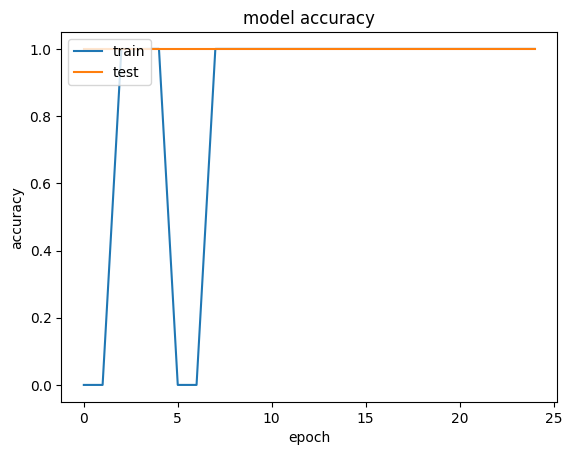

<Figure size 640x480 with 0 Axes>

In [144]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'] , loc='upper left')
plt.show()

plt.savefig('screenshot.png',bbox_inches='tight')

In [144]:
pred_